<p style=" background-color:#f0ec56;font-family:newtimeroman;font-size:200%;color:#5A6F7D;text-align:center;border-radius:20px 20px;"><span  style = "padding : 50px; display : block; "><b>Phone Sales Analysis</b></span></p>

# Column Descriptions
1.**Smartphone**: A detailed description of the smartphone's full name, model, and specifications (such as RAM, storage capacity).

2.**Brand**: The manufacturer brand of the smartphone (e.g., Realme, Samsung, Motorola).

3.**Model**: The model name or number of the smartphone (e.g., C55, Galaxy M23).

4.**RAM**: The amount of RAM (in GB) that the smartphone has, which affects its multitasking performance.

5.**Storage**: The internal storage capacity of the smartphone (in GB). This represents the space available for storing apps, photos, and other files.

6.**Color**: The color of the smartphone (e.g., Yellow, Blue, Gray, White).

7.**Free**: Information indicating whether the smartphone is tied to a carrier. "Yes" means the phone is "SIM-free" or unlocked, allowing it to be used with any carrier.

8.**Final Price**: The final sale price of the smartphone, representing the ultimate cost after discounts or promotions.

<a id='import-library'></a>
# <font color=#5A6F7D> <b>Importing Libraries</b><font color='black'> 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

<a id='loading-dataset'></a>
# <font color=#5A6F7D> <b>Loading The Data Set</b><font color='black'> 

In [8]:
df = pd.read_csv("smartphones.csv")

In [9]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [10]:
df1 = df.copy()

<a id='understanding-dataset'></a>
# <font color=#5A6F7D> <b>Understanding The Dataset</b><font color='black'> 

In [12]:
df.size

14528

In [13]:
df.shape

(1816, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM,1333.0,5.960990,2.668070,1.00,4.00,6.00,8.0000,12.00
Storage,1791.0,162.652150,139.411605,2.00,64.00,128.00,256.0000,1000.00
Final Price,1816.0,492.175573,398.606183,60.46,200.99,349.99,652.7175,2271.28


In [16]:
df.isnull().sum()

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [17]:
df.duplicated().sum()

0

<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Determining Categoric & Numeric Columns</b><font color='black'> 

In [19]:
# Categoric Columns

In [20]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object", "category", "bool"]]
cat_cols

['Smartphone', 'Brand', 'Model', 'Color', 'Free']

In [21]:
# Numeric Columns

In [22]:
num_cols = [col for col in df.columns if col not in cat_cols]
num_cols

['RAM', 'Storage', 'Final Price']

In [23]:
# infos about cat_cols

In [24]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({
        col_name: dataframe[col_name].value_counts(),  # Count of unique values
        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)  # Percentage of each unique value
    }))
    print("------------------------------------------------------------------")

for col in cat_cols:
    cat_summary(df, col)

                                                  Smartphone     Ratio
Smartphone                                                            
Realme C55 8/256GB Sunshower Libre                         1  0.055066
Samsung Galaxy A53 5G 8/256GB Azul Libre                   1  0.055066
Huawei P30 Pro 8/128GB Breathing Crystal Libre             1  0.055066
Huawei Nova 10 8/128GB Plata Libre                         1  0.055066
Samsung Galaxy A21s 3/32GB Negro Libre                     1  0.055066
...                                                      ...       ...
Samsung Galaxy Note 10 Plus 256GB Blanco Libre             1  0.055066
Cubot P80 8/256GB Morado Libre                             1  0.055066
Huawei P30 Pro 8/128GB Black Libre                         1  0.055066
Apple iPhone XS Max 256Gb Gris Espacial Libre              1  0.055066
Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre           1  0.055066

[1816 rows x 2 columns]
----------------------------------------------------

In [25]:
df.sample()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
1464,POCO M5s 4/64GB Blanco Libre + Xiaomi Mi Carga...,Xiaomi,M5s,4.0,64.0,White,Yes,249.9


<a id='understanding-dataset'></a>
# <font color=#5A6F7D> <b>Organizing Columns</b><font color='black'> 

In [27]:
#organizing columns 

In [28]:
df.columns

Index(['Smartphone', 'Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free',
       'Final Price'],
      dtype='object')

In [29]:
df.columns.str.lower()

Index(['smartphone', 'brand', 'model', 'ram', 'storage', 'color', 'free',
       'final price'],
      dtype='object')

In [30]:
df.columns = df.columns.str.lower()

In [31]:
df.columns

Index(['smartphone', 'brand', 'model', 'ram', 'storage', 'color', 'free',
       'final price'],
      dtype='object')

In [32]:
df.columns

Index(['smartphone', 'brand', 'model', 'ram', 'storage', 'color', 'free',
       'final price'],
      dtype='object')

In [33]:
df.columns = ['smartphone', 'brand', 'model', 'ram', 'storage', 'color', 'free','final_price']

In [34]:
# i droped Smartphone columns becaue other features already hold this infos

In [35]:
df.drop(columns = "smartphone", axis=0, inplace= True)

In [36]:
df.head()

,brand,model,ram,storage,color,free,final_price
0,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [37]:
df['free'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
df['free'].value_counts()

free
Yes    1772
No       44
Name: count, dtype: int64

In [39]:
df[df.free == "No" ].shape

(44, 7)

In [40]:
df[df.free == "Yes" ].shape

(1772, 7)

In [41]:
df.model.nunique()

383

In [42]:
df.ram.value_counts()

ram
8.0     381
4.0     380
6.0     259
3.0     112
12.0    109
2.0      88
1.0       4
Name: count, dtype: int64

<a id='understanding-dataset'></a>
# <font color=#5A6F7D> <b>Duplicated Columns</b><font color='black'> 

In [44]:
# duplicated columns

In [45]:
df.duplicated().sum()

16

In [46]:
df.drop_duplicates(inplace = True)

In [47]:
df.duplicated().sum()

0

<a id='understanding-dataset'></a>
# <font color=#5A6F7D> <b>NaN Values</b><font color='black'> 

In [49]:
df.isnull().sum()

brand            0
model            0
ram            482
storage         25
color            0
free             0
final_price      0
dtype: int64

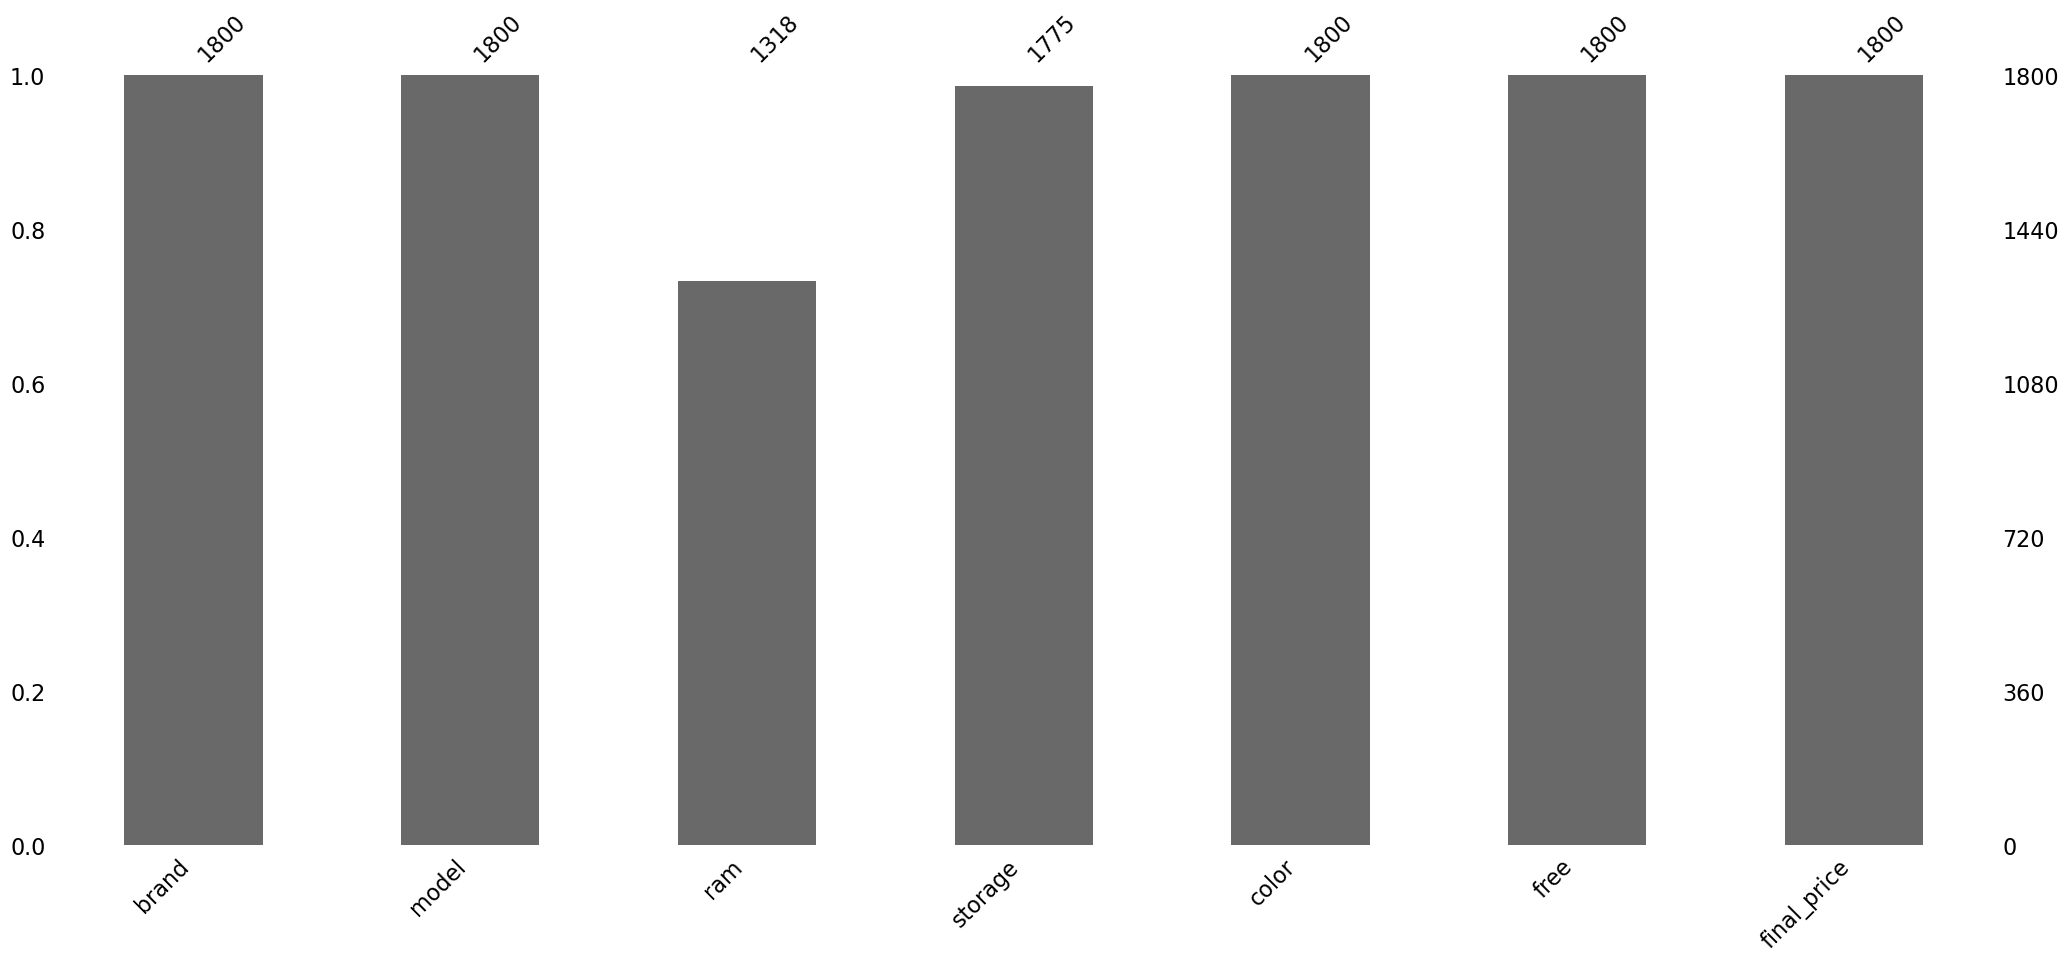

In [50]:
msno.bar(df);

**The msno.bar() method is a tool that allows you to quickly get an overview of the missing values in a DataFrame and the number of missing values in each column**

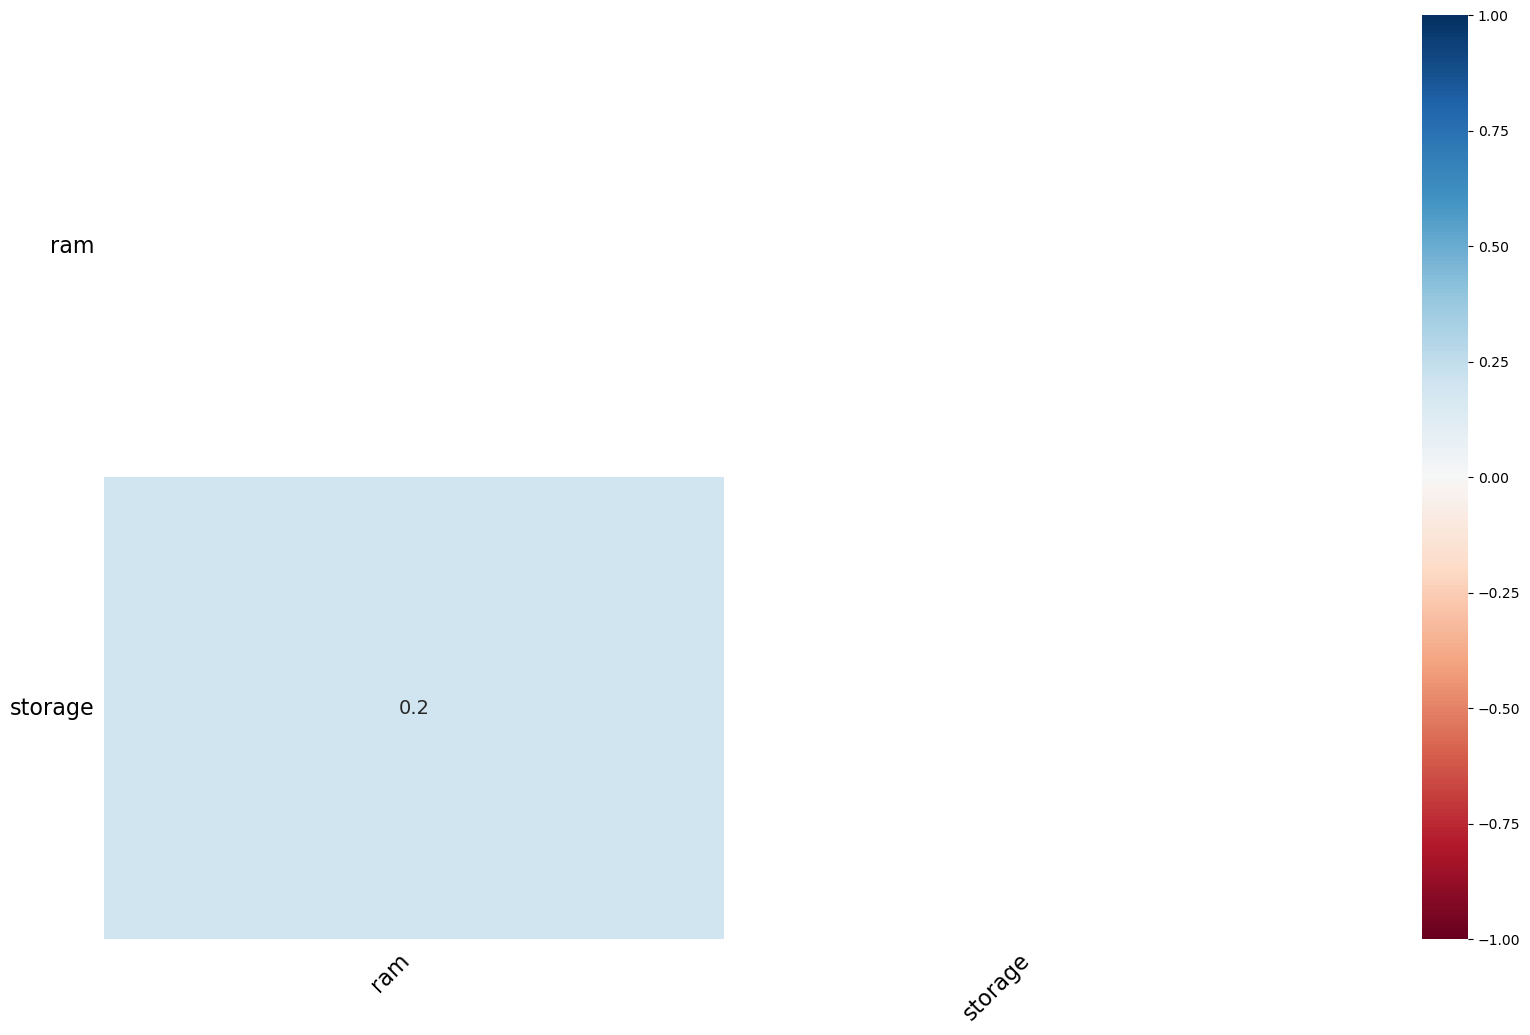

In [52]:
msno.heatmap(df);

**The heatmap() method of the missingno library visualizes the relationship of missing values (NaN) between columns. This method shows the rate of co-occurrence of missing values between columns.**
**Value Meaning (0.2): The co-occurrence rate of missing values between two columns is low, meaning that there is no obvious missing value relationship between these columns. They have only 20% of missing values in common.**



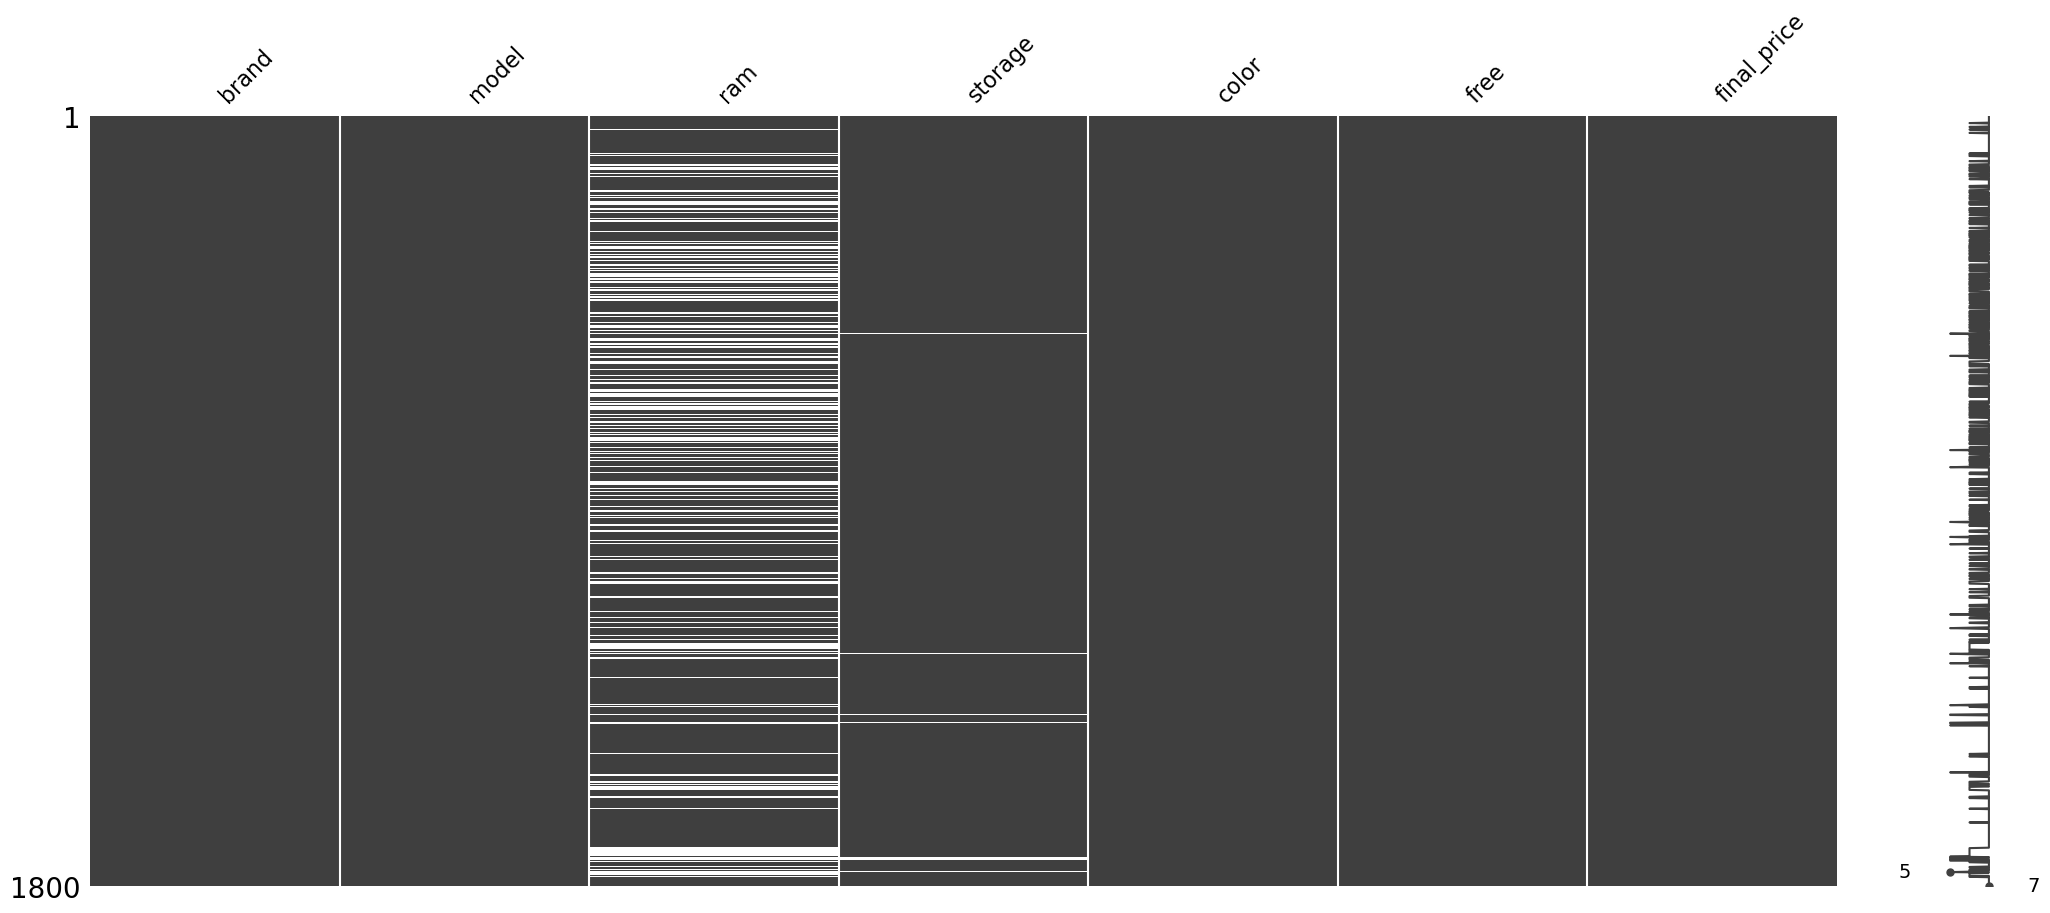

In [54]:
msno.matrix(df);

In [55]:
# nan values

In [56]:
df.sample()

,brand,model,ram,storage,color,free,final_price
1570,Samsung,Galaxy S21,NaN,128.0,Silver,Yes,889.65


In [57]:
df.groupby("model")[["storage"]].mean().round()

,storage
model,
1 (2021),16.0
10,141.0
10 AMOLED,192.0
11 Lite,128.0
11 Pro,203.0
...,...
iPhone 8,151.0
iPhone SE,152.0
iPhone X,128.0


In [58]:
# Fill in missing values by calculating storage averages based on model
df.storage.fillna(df.groupby("model")["storage"].transform("mean").round(),inplace = True)

In [59]:
df.groupby("model")[["ram"]].mean().round()

,ram
model,
1 (2021),1.0
10,6.0
10 AMOLED,8.0
11 Lite,8.0
11 Pro,7.0
...,...
iPhone 8,NaN
iPhone SE,NaN
iPhone X,NaN


In [60]:
# Fill in missing values by calculating RAM averages based on model
df.ram.fillna(df.groupby("model")["ram"].transform("mean").round(),inplace = True)

In [61]:
# For models with only one instance, missing RAM values remained as NaN
df.ram.isnull().sum()

392

In [62]:
# For models with only one instance, missing storage values remained as NaN
df.storage.isnull().sum()

18

In [63]:
df.groupby(["brand", "storage"])["ram"].apply(lambda x: x.mode())

brand    storage   
Alcatel  16.0     0    1.0
         32.0     0    2.0
         64.0     0    6.0
Apple    64.0     0    7.0
         256.0    0    7.0
                      ... 
Xiaomi   128.0    0    6.0
         256.0    0    8.0
ZTE      32.0     0    2.0
         64.0     0    3.0
         128.0    0    4.0
Name: ram, Length: 117, dtype: float64

In [64]:
# I filled the previously undetected NaN values using the mode based on brand and storage information
df['ram'].fillna(df.groupby(['brand', 'storage'])['ram'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),inplace = True)

In [65]:
df.ram.isnull().sum()

129

In [66]:
# I filled the previously undetected NaN values using the mode of RAM models based on brands
df['ram'].fillna(df.groupby(['brand'])['ram'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),inplace = True)

In [67]:
df.ram.isnull().sum()

4

In [68]:
# I filled the previously undetected NaN values using the mode of storage models based on brands
df['storage'].fillna(df.groupby(['brand'])['storage'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),inplace = True)

In [69]:
df.storage.isnull().sum()

0

In [70]:
# Finally, I dropped the NaN values that couldn't be filled
df.dropna(inplace = True)

In [71]:
df.isnull().sum()

brand          0
model          0
ram            0
storage        0
color          0
free           0
final_price    0
dtype: int64

<a id='understanding-dataset'></a>
# <font color=#5A6F7D> <b>Outliers</b><font color='black'> 

In [73]:
# outliers 

In [74]:
numeric_df = df.select_dtypes(include='number')

In [75]:
numeric_df.sample()

,ram,storage,final_price
1748,6.0,128.0,468.0


In [76]:
df.select_dtypes(include='number').columns

Index(['ram', 'storage', 'final_price'], dtype='object')

In [77]:
def outliers(df):
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = numeric_df[(numeric_df[col] < (Q1 - 3 * IQR)) | (df[col] > (Q3 + 3 * IQR))]
        
        print(f"{col} - Outliers:")
        print(f"Number of Outliers: {outliers.shape[0]}")
        print(outliers[[col]])  
        print("---------------------------")


The outliers(df) function detects outliers for numerical columns in a given DataFrame. Outliers are identified using the IQR (Interquartile Range) method, and the count of outliers along with the specific outlier values for each column is printed to the console.

In [79]:
outliers(df)

ram - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [ram]
Index: []
---------------------------
storage - Outliers:
Number of Outliers: 17
      storage
538    1000.0
553    1000.0
649    1000.0
656    1000.0
789    1000.0
795    1000.0
918    1000.0
980    1000.0
1169   1000.0
1279   1000.0
1586   1000.0
1727   1000.0
1728   1000.0
1729   1000.0
1730   1000.0
1732   1000.0
1780   1000.0
---------------------------
final_price - Outliers:
Number of Outliers: 5
      final_price
656       2119.00
789       2119.00
918       2119.00
1380      2271.28
1586      2191.29
---------------------------


In [80]:
df[df.final_price > 2000]

,brand,model,ram,storage,color,free,final_price
656,Apple,iPhone 14,7.0,1000.0,Purple,Yes,2119.00
789,Apple,iPhone 14,7.0,1000.0,Gold,Yes,2119.00
918,Apple,iPhone 14,7.0,1000.0,Silver,Yes,2119.00
1380,Honor,Magic4,8.0,256.0,Turquoise,Yes,2271.28
1586,Samsung,Galaxy S23,8.0,1000.0,Green,Yes,2191.29


In [81]:
df[df.model == "iPhone 14"]

,brand,model,ram,storage,color,free,final_price
16,Apple,iPhone 14,7.0,128.0,Black,Yes,1009.00
25,Apple,iPhone 14,7.0,256.0,Black,Yes,1599.00
31,Apple,iPhone 14,7.0,128.0,Black,Yes,1469.00
39,Apple,iPhone 14,7.0,128.0,Gold,Yes,1469.00
88,Apple,iPhone 14,7.0,128.0,Black,Yes,1319.00
90,Apple,iPhone 14,7.0,256.0,Gold,Yes,1599.00
93,Apple,iPhone 14,7.0,256.0,Silver,Yes,1599.00
94,Apple,iPhone 14,7.0,128.0,White,Yes,1009.00
116,Apple,iPhone 14,7.0,256.0,Purple,Yes,1289.00
121,Apple,iPhone 14,7.0,128.0,Purple,Yes,1009.00


### Note about outliers: 
In the dataset, phones with 1000 GB storage create outliers due to their high prices. However, these phones are part of the premium (luxury) segment, and their high prices are natural. Therefore, rather than removing them, they should be analyzed correctly. Removing them would result in data loss and hinder our understanding of the luxury segment of the market. These phones represent a specific segment of the dataset, and analyzing this segment provides more meaningful insights.

<a id='understanding-dataset'></a>
# <font color=#5A6F7D > <b>Data Visualization</b><font color='black'> 

In [84]:
df.columns

Index(['brand', 'model', 'ram', 'storage', 'color', 'free', 'final_price'], dtype='object')

In [85]:
# most sold brands

In [86]:
number_of_sld_brd = df.groupby("brand").count().iloc[:,1].reset_index(name = "count").sort_values(by="count",ascending=False)
number_of_sld_brd

,brand,count
27,Samsung,450
32,Xiaomi,348
1,Apple,291
25,Realme,116
21,OPPO,92
23,POCO,67
13,Huawei,57
18,Motorola,55
29,TCL,36
6,Cubot,33


In [87]:
top_5 = number_of_sld_brd[0:6]
top_5

,brand,count
27,Samsung,450
32,Xiaomi,348
1,Apple,291
25,Realme,116
21,OPPO,92
23,POCO,67


<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Heatmap</b><font color='black'> 

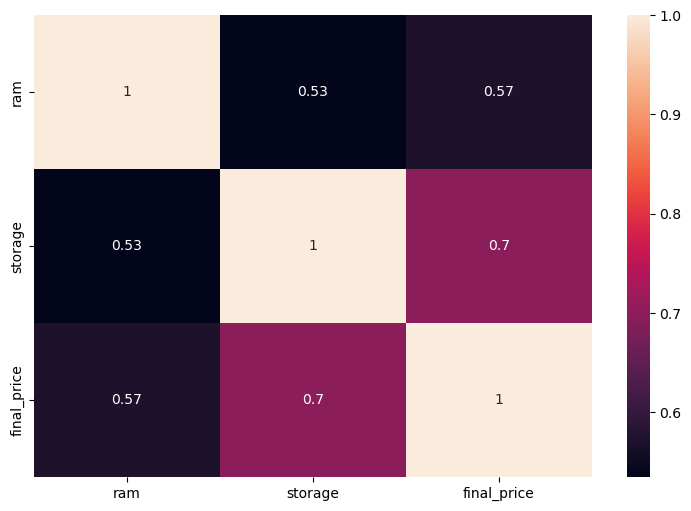

In [89]:
plt.figure(figsize = (9,6))
sns.heatmap(numeric_df.corr(), annot = True)
plt.show()

### Insights from Heatmap
**This heatmap shows that both RAM and storage have a positive impact on price; the correlation between RAM and price is 0.57, while the correlation between storage and price is 0.7, indicating that storage has a stronger effect on price. Additionally, there is a moderate positive relationship (0.53) between RAM and storage, suggesting that these two variables tend to increase together.**

<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Pairplot</b><font color='black'> 

<Figure size 900x600 with 0 Axes>

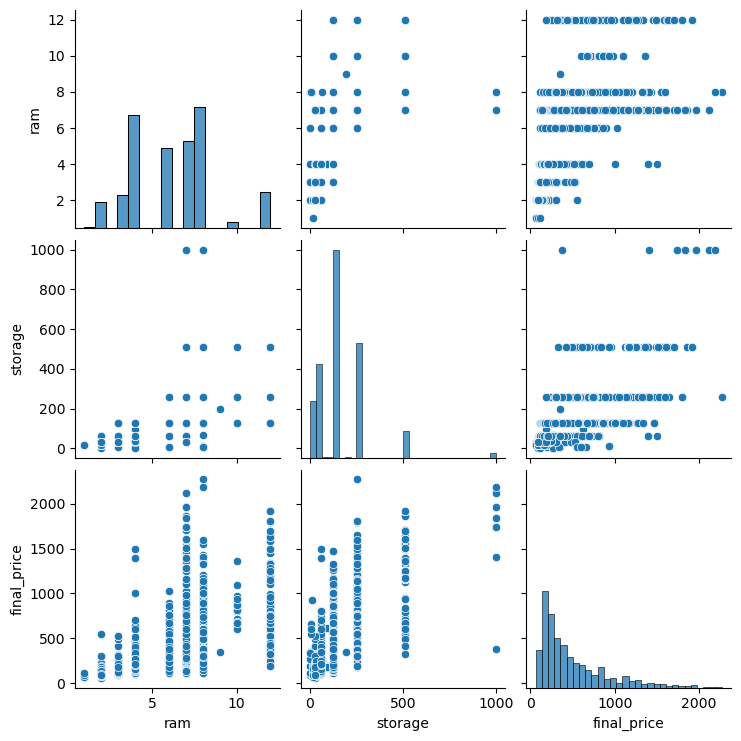

In [92]:
plt.figure(figsize = (9,6))
sns.pairplot(numeric_df)
plt.show()

<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Display Box plots to See Outliers</b><font color='black'> 

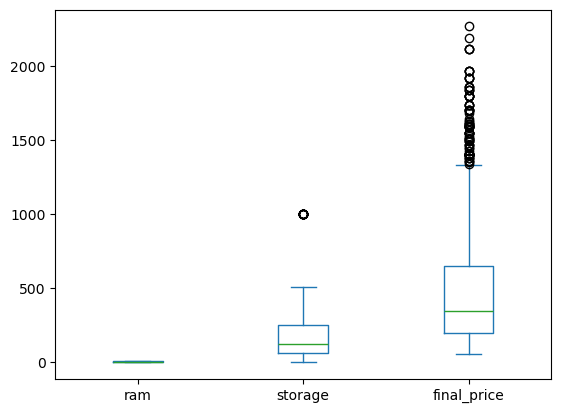

In [94]:
df.plot(kind= "box");

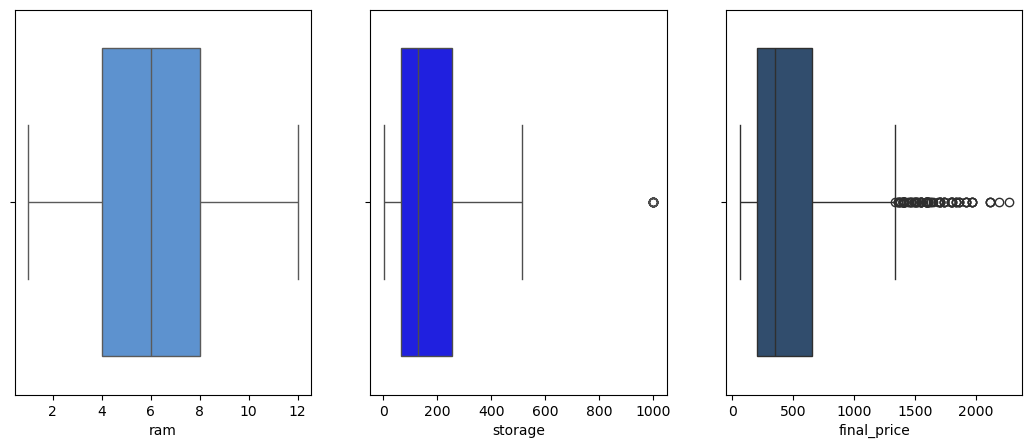

In [95]:
fig, axes = plt.subplots(1,3,figsize = (13,5))
sns.boxplot(x="ram",data=df, color= "#4A90E2", ax= axes[0])
sns.boxplot(x="storage",data=df, color= "blue", ax= axes[1])
sns.boxplot(x="final_price",data=df, color= "#274C77", ax= axes[2])
plt.show()

<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Brands by Count</b><font color='black'> 

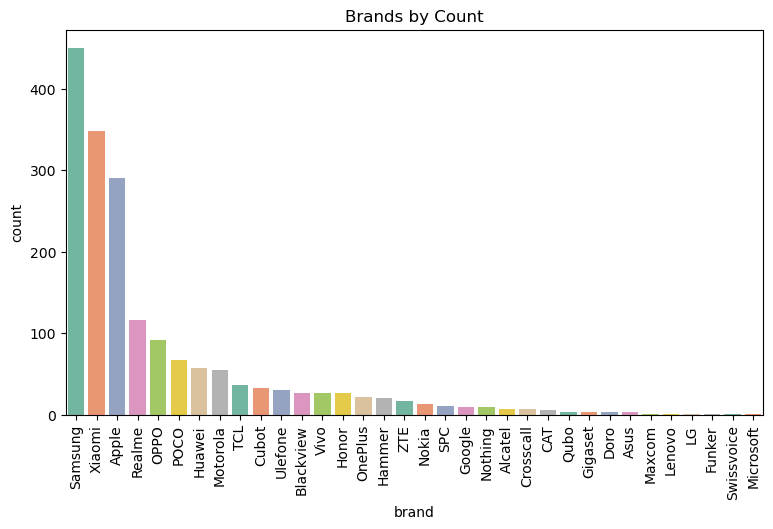

In [97]:
plt.figure(figsize=(9,5))
sns.barplot(x="brand",y="count",data=number_of_sld_brd, palette = "Set2")
plt.xticks(rotation=90)
plt.title("Brands by Count")
plt.show()

<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Top 5 Brands</b><font color='black'> 

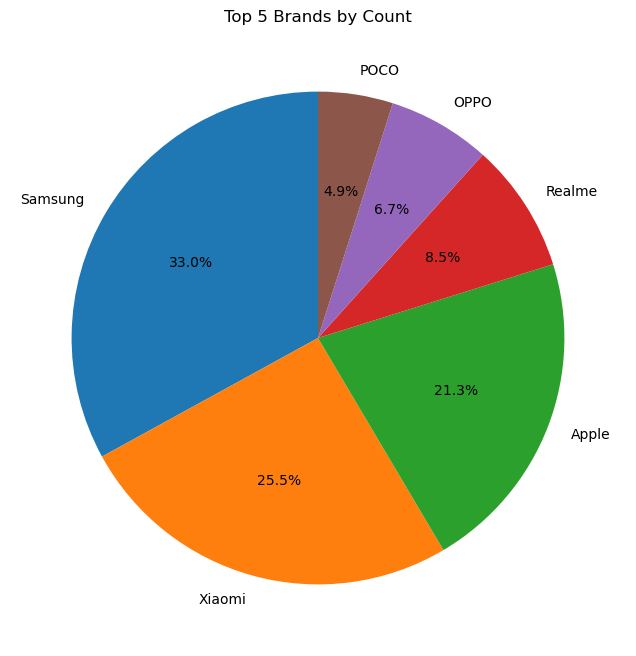

In [99]:
plt.figure(figsize=(8, 8))
plt.pie(top_5["count"],labels=top_5["brand"],autopct='%1.1f%%', startangle=90  )               
plt.title("Top 5 Brands by Count")
plt.show()

<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Top 10 Models</b><font color='black'> 

In [101]:
number_of_sld_model = df.groupby("model").count().iloc[:,1].reset_index(name = "count").sort_values(by="count",ascending=False)
top_10_model = number_of_sld_model[0:11]

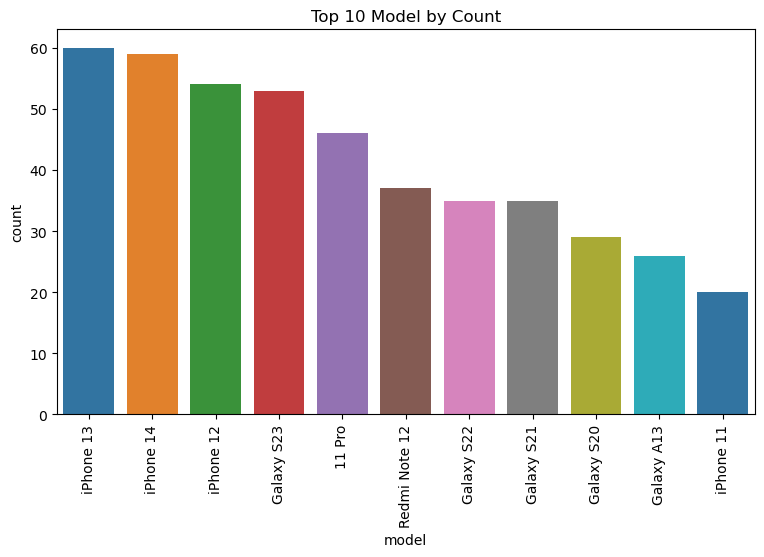

In [102]:
plt.figure(figsize=(9, 5))
sns.barplot(x="model", y="count", data=top_10_model,palette="tab10")            
plt.title("Top 10 Model by Count")
plt.xticks(rotation=90)
plt.show()

<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Brands by AVG Final Price</b><font color='black'> 

In [104]:
grp_price = df.groupby("brand")["final_price"].mean().reset_index(name = "mean").sort_values(by="mean",ascending=False)

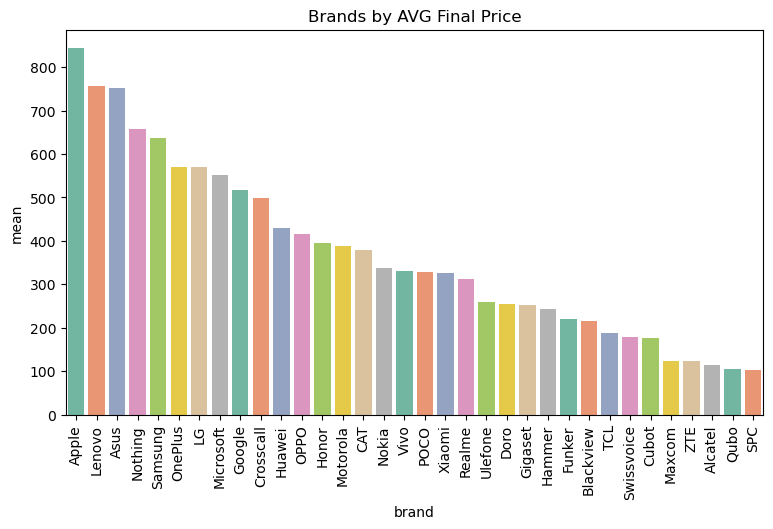

In [105]:
plt.figure(figsize=(9,5))
sns.barplot(x="brand",y="mean",data=grp_price, palette = "Set2")
plt.xticks(rotation=90)
plt.title("Brands by AVG Final Price")
plt.show()

<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Display Colors of Phones</b><font color='black'> 

In [107]:
colors = df.groupby("color").count().iloc[:,1].reset_index(name = "count").sort_values(by="count",ascending=False)

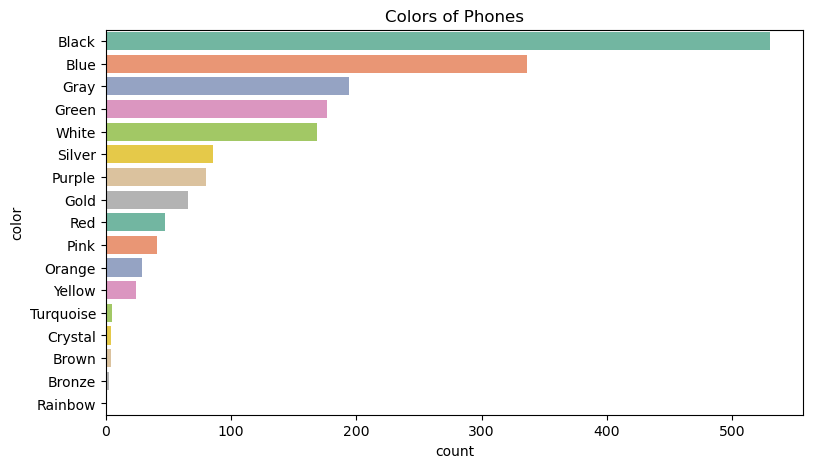

In [108]:
plt.figure(figsize=(9,5))
sns.barplot(x="count",y="color",data=colors, palette = "Set2")
plt.title("Colors of Phones")
plt.show()

<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Histplot</b><font color='black'> 

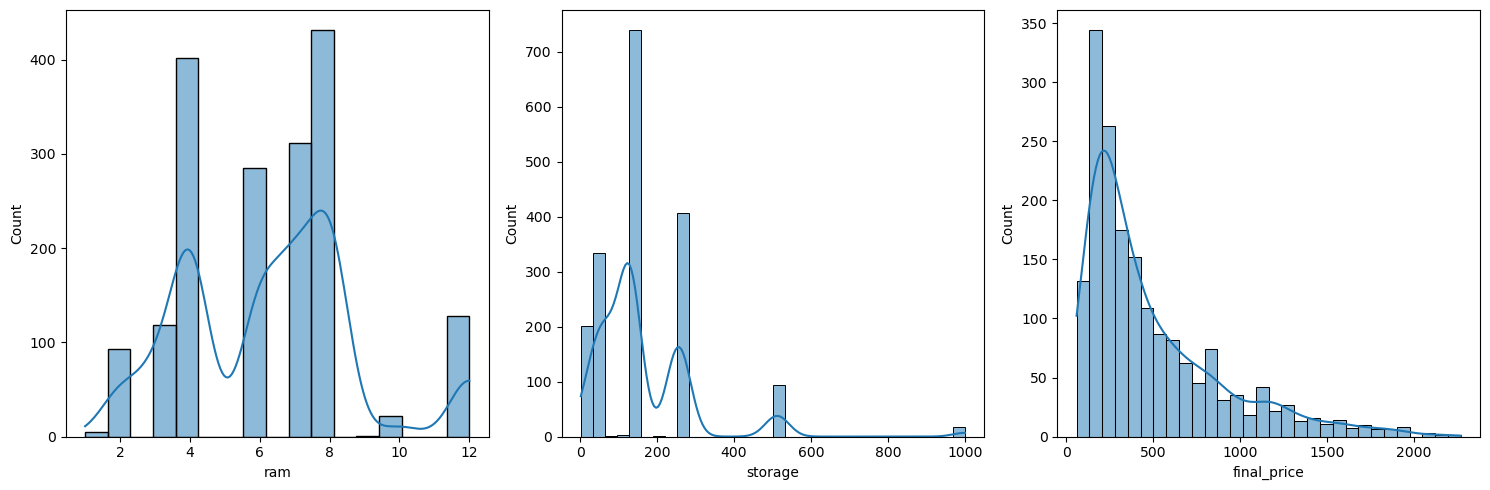

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(x="ram", data=df, kde = True ,ax=axes[0])
sns.histplot(x="storage", data=df, kde = True, ax=axes[1])
sns.histplot(x="final_price", data=df, kde = True, ax=axes[2])
plt.tight_layout()
plt.show()

<a id='understanding-dataset'></a>
## <font color=#5A6F7D> <b>Display the relationship between RAM-final_price and storage-final_price.</b><font color='black'> 

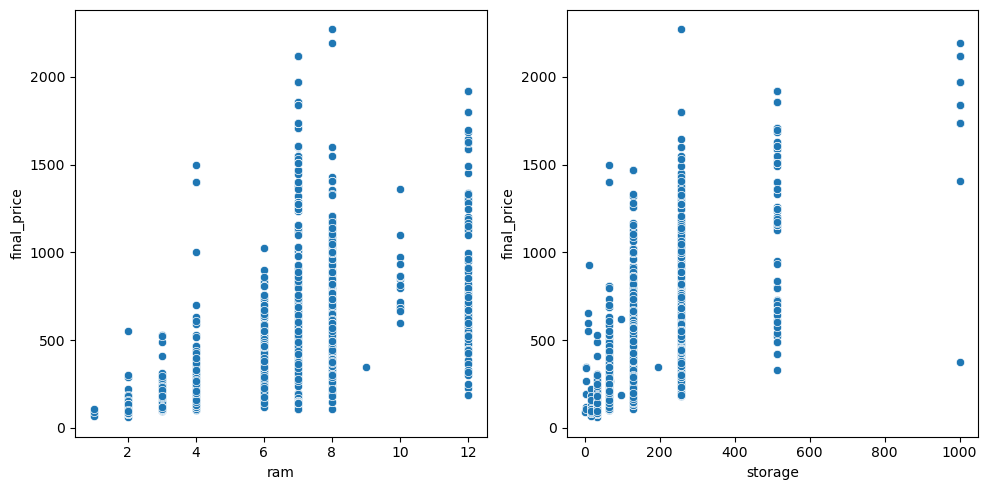

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x="ram",y="final_price" ,data=df ,ax=axes[0])
sns.scatterplot(x="storage",y="final_price" ,data=df,  ax=axes[1])
plt.tight_layout()
plt.show()

<a id='understanding-dataset'></a>
# <font color=#5A6F7D> <b>Export the cleaned data</b><font color='black'> 

In [113]:
df.to_csv("phone_sales_clean_data.csv")

<p style=" background-color:#f0ec56;font-family:newtimeroman;font-size:200%;color:#5A6F7D;text-align:center;border-radius:20px 20px;"><span  style = "padding : 20px; display : block; "><b>Thank You!</b></span></p>